# Medidas del confocal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename='surface_test.dat'

In [3]:
%%time
data=np.genfromtxt(filename, delimiter=' ', dtype=float)

CPU times: user 1.63 s, sys: 95.4 ms, total: 1.73 s
Wall time: 1.69 s


In [4]:
x=np.unique(data[:,0])
y=np.unique(data[:,1])

In [5]:
print("size = {} x {}". format(len(x), len(y)))

size = 762 x 560


In [6]:
z=np.reshape(data[:,2],(len(y), len(x)))

In [7]:
std=z.std()

In [8]:
z.mean(), z.min(), z.max()

(7.920884889407998e-07, -6.089, 4.073)

In [9]:
z_max=max(np.abs(z.min()), np.abs(z.max()))

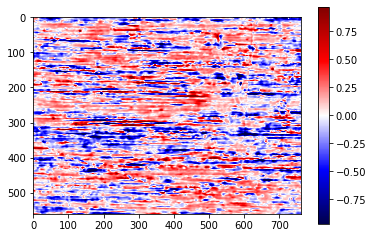

In [10]:
plt.imshow(z)
plt.set_cmap('seismic')
plt.colorbar()

plt.clim(-z_max,z_max)
plt.clim(-3*std,3*std)

In [11]:
histogram, bins = np.histogram(z.flatten(), bins='auto')


(0.0, 7631.4)

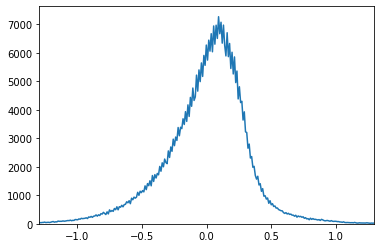

In [12]:
plt.plot(bins[:-1],histogram)
plt.xlim(-4*std, 4*std)
plt.ylim(ymin=0)

## Medida de la correlación espacial

In [19]:
from numpy.fft import fft2, ifft2

fc = np.roll(ifft2(fft2(z).conj()*fft2(z)).real, (z.shape[0] - 1)//2, axis=(0,1))

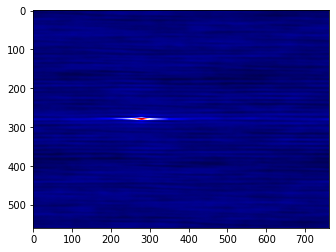

In [21]:
plt.imshow(fc)

In [27]:
fc[fc==fc.max()]

array([44742.600092])

In [29]:
fc.argmax()

212877

In [31]:
result = np.where(fc == np.amax(fc))
print('Tuple of arrays returned : ', result)
print('List of coordinates of maximum value in Numpy array : ')
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)

Tuple of arrays returned :  (array([279]), array([279]))
List of coordinates of maximum value in Numpy array : 
(279, 279)


In [37]:
result

(array([279]), array([279]))

In [32]:
x[279], y[279]

(101.835, 101.835)

(0.0, 47070.05924594998)

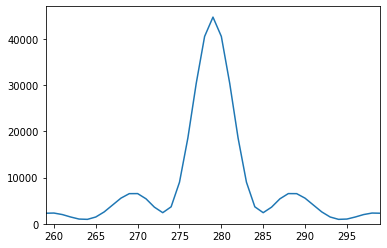

In [43]:
plt.plot(fc[:,279])
plt.xlim(279-20,279+20)
plt.ylim(ymin=0)

(0.0, 46856.11753024998)

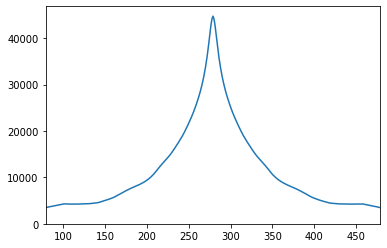

In [44]:
plt.plot(fc[279,:])
plt.xlim(279-200,279+200)
plt.ylim(ymin=0)

In [36]:
fc.max()

44742.600091999986